Comparison-3 models


1.   SVM
2.   KNN- with and without brute force
3.   NB

wine and petal dataset
Find accuracy, confusion matrix for each method
total 8

Dataset Name|Classifier|True Positive|True Negative|False Positive|False Negative|Sensitivity|FM Score| Accuracy|False Positive Rate
Save it in an excel sheet

Sort the above table using accuracy, fm score, fpr

Find the top 3 models

Do the regression analysis for all the 8- to find more bias and less variance

CM Online
[link text](https://confusionmatrixonline.com/)

In [ ]:
import pandas as pd
import numpy as np
import os
import math
import operator
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [ ]:
iris=datasets.load_iris()
wine=datasets.load_wine()

TP TN FP FN info
[link text](https://towardsdatascience.com/classifying-model-outcomes-true-false-positives-negatives-177c1e702810)

Sensitivity and Specificity
https://towardsdatascience.com/evaluating-categorical-models-ii-sensitivity-and-specificity-e181e573cff8

NBT for WINE

K10 CV
Looping:
[0 1 1 1 1 1 0 1 1 2 1 2 1 0 2 1 0 1]
Accuracy in loop  1 : 0.9444444444444444
[[ 4  0  0]
 [ 0 11  1]
 [ 0  0  2]]

[0 1 1 1 1 2 0 1 1 1 2 0 1 2 2 0 2 1]
Accuracy in loop  2 : 1.0
[[4 0 0]
 [0 9 0]
 [0 0 5]]

[1 2 0 2 1 0 1 0 0 2 0 0 2 1 1 1 1 1]
Accuracy in loop  3 : 0.9444444444444444
[[6 0 0]
 [0 8 1]
 [0 0 3]]

[1 1 2 0 0 1 0 2 2 1 0 2 1 2 0 0 2 1]
Accuracy in loop  4 : 0.9444444444444444
[[6 0 0]
 [0 6 1]
 [0 0 5]]

[2 2 2 1 2 1 0 0 2 1 0 0 1 0 1 2 0 0]
Accuracy in loop  5 : 1.0
[[7 0 0]
 [0 5 0]
 [0 0 6]]

[1 1 0 2 0 1 1 1 0 2 2 0 2 1 0 1 0 1]
Accuracy in loop  6 : 1.0
[[6 0 0]
 [0 8 0]
 [0 0 4]]

[1 0 2 2 0 1 2 1 0 1 1 1 1 1 1 1 2 0]
Accuracy in loop  7 : 0.9444444444444444
[[ 4  0  0]
 [ 0 10  1]
 [ 0  0  3]]

[2 1 1 0 0 0 0 1 1 0 0 1 1 0 2 1 2 1]
Accuracy in loop  8 : 0.9444444444444444
[[6 0 0]
 [1 8 0]
 [0 0 3]]

[1 1 0 1 1 1 2 0 2 2 2 2 2 1 1 2 1 0]
Accuracy in loop  9 : 1.0
[[3 0 0]
 [0 8 0]
 [0 0 7]]

[0 1 1 1 1 1 1 0 0 2 2 2 0 2 1 0 1 1]
Accuracy in loop

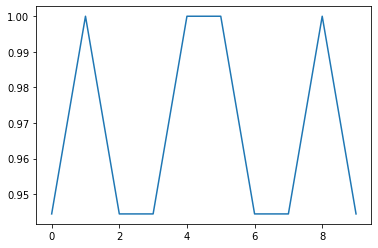

[[5 1 0]
 [0 8 0]
 [0 0 4]]



In [ ]:
print("K10 CV")
'''
print(wine)
print('Features:',wine.feature_names)
print('Labels:',wine.target_names)
'''
x=pd.DataFrame(wine['data'])
'''
print(x.head())
print(wine.data.shape)
y=wine.target
'''
from sklearn import metrics
l=list()
s=0
print('Looping:',end='\n')
for x in range(10):
  x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1)
  gnb=GaussianNB()
  gnb.fit(x_train,y_train)
  y_pred=gnb.predict(x_test)
  print(y_pred)
  a=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy in loop ",x+1,":",a)
  l.append(a)
  cm=np.array(confusion_matrix(y_test,y_pred))
  print(cm)
  print()
print(l)
for j in l:
  s+=j
print("Average: ",s/10)
plt.plot(l)
plt.show()
cm=np.array(confusion_matrix(y_test,y_pred))
print(cm)
print()

NBT for PETAL

K10 CV
Looping:
[0 0 0 2 0 2 2 2 0 2 1 0 0 1 0]
Accuracy in loop  1 : 1.0
[[8 0 0]
 [0 2 0]
 [0 0 5]]

[0 2 1 2 1 1 1 1 2 1 2 0 1 0 2]
Accuracy in loop  2 : 0.9333333333333333
[[3 0 0]
 [0 7 1]
 [0 0 4]]

[1 0 1 2 1 1 0 0 1 0 0 2 0 1 0]
Accuracy in loop  3 : 1.0
[[7 0 0]
 [0 6 0]
 [0 0 2]]

[0 0 1 0 1 1 2 2 2 2 2 1 0 0 1]
Accuracy in loop  4 : 0.9333333333333333
[[5 0 0]
 [0 5 1]
 [0 0 4]]

[0 2 2 1 1 0 2 2 0 0 0 2 2 2 1]
Accuracy in loop  5 : 0.9333333333333333
[[5 0 0]
 [0 3 1]
 [0 0 6]]

[0 1 1 2 1 0 0 1 1 2 1 2 0 1 1]
Accuracy in loop  6 : 0.8666666666666667
[[4 0 0]
 [0 6 0]
 [0 2 3]]

[2 1 1 1 2 1 0 1 1 0 0 0 1 2 0]
Accuracy in loop  7 : 0.9333333333333333
[[5 0 0]
 [0 6 0]
 [0 1 3]]

[0 2 0 2 2 1 0 2 0 2 1 1 0 1 1]
Accuracy in loop  8 : 0.9333333333333333
[[5 0 0]
 [0 4 0]
 [0 1 5]]

[1 1 1 2 2 0 2 2 0 0 2 0 2 2 1]
Accuracy in loop  9 : 0.9333333333333333
[[4 0 0]
 [0 3 0]
 [0 1 7]]

[0 1 0 1 0 0 2 0 1 0 2 1 2 1 2]
Accuracy in loop  10 : 0.8666666666666667
[[6 0 0]
 [0 3 0]
 [0 

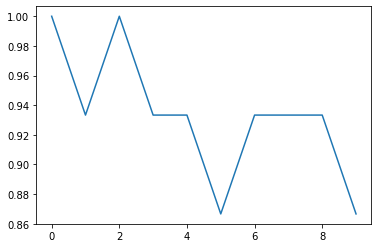

[[6 0 0]
 [0 3 0]
 [0 2 4]]



In [ ]:
print("K10 CV")
'''
print(iris)
print('Features:',iris.feature_names)
print('Labels:',iris.target_names)
'''
x=pd.DataFrame(iris['data'])
'''
print(x.head())
print(iris.data.shape)
y=iris.target
'''
from sklearn import metrics
l=list()
s=0
print('Looping:',end='\n')
for x in range(10):
  x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1)
  gnb=GaussianNB()
  gnb.fit(x_train,y_train)
  y_pred=gnb.predict(x_test)
  print(y_pred)
  a=metrics.accuracy_score(y_test,y_pred)
  print("Accuracy in loop ",x+1,":",a)
  l.append(a)
  cm=np.array(confusion_matrix(y_test,y_pred))
  print(cm)
  print()
print(l)
for j in l:
  s+=j
print("Average: ",s/10)
plt.plot(l)
plt.show()
cm=np.array(confusion_matrix(y_test,y_pred))
print(cm)
print()

KNN with fixed K for WINE

In [ ]:
'''
print(wine)
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)
'''
x=pd.DataFrame(wine['data'])
'''
print("x head:\n",x.head())
print("shape:\n",wine.data.shape)
y=print(wine.target)
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25)
print("x_train:\n",x_train)
print("y_train:\n",y_train)
print("x_test:\n",x_test)
print("y_test:\n",y_test)
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
comb=[]
value=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.10)
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  comb.append('comb'+str(i))
  value.append(accuracy)
  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(len(value))
value.append((sum(value))/len(value))
print("Average of the model:",(sum(value))/len(value))
print(y_test)
print(y_pred)
cm=np.array(confusion_matrix(y_test,y_pred))
print(cm)

Accuracy: 0.7222222222222222
1
Accuracy: 0.6666666666666666
2
Accuracy: 0.8333333333333334
3
Accuracy: 0.7222222222222222
4
Accuracy: 0.7222222222222222
5
Accuracy: 0.6666666666666666
6
Accuracy: 0.5555555555555556
7
Accuracy: 0.8888888888888888
8
Accuracy: 0.7222222222222222
9
Accuracy: 0.8333333333333334
10
Average of the model: 0.7333333333333333
[1 0 0 1 2 2 2 0 1 2 0 2 0 1 2 2 0 0]
[1 0 0 1 2 1 2 0 1 1 0 2 0 1 2 1 0 0]
[[7 0 0]
 [0 4 0]
 [0 3 4]]


KNN with brute force for WINE

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The accuracy for optimal k = 43 using brute force is 66.66666666666666
Classification report using brute force
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.43      0.75      0.55         4
           2       0.60      0.43      0.50         7

    accuracy                           0.67        18
   macro avg       0.68      0.68      0.66        18
weighted avg       0.72      0.67      0.67        18

[[6 0 1]
 [0 3 1]
 [0 4 3]]


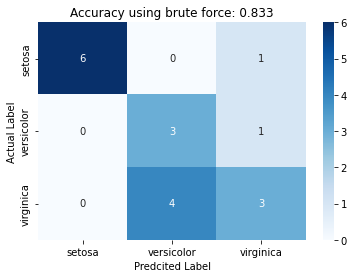

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=[]
neighbors=list(np.arange(3,50,2))
print(neighbors)
for n in neighbors:
  knn=KNeighborsClassifier(n_neighbors=n,algorithm='brute')
  cross_val=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(cross_val.mean())
error=[1-x for x in cv_scores]
optimal_n=neighbors[error.index(min(error))]
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_n,algorithm='brute')
knn_optimal.fit(x_train,y_train)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute force is {1}".format(optimal_n,acc))
print("Classification report using brute force")
print(classification_report(y_test,pred))
cm=confusion_matrix(y_test,pred)
print(cm)
cm_df=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('Accuracy using brute force: {0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('Actual Label')
plt.xlabel('Predcited Label')
plt.show()


KNN with fixed K for PETAL

In [ ]:
iris=datasets.load_iris()
'''
print(iris)
print("Features:", iris.feature_names)
print("Labels:", iris.target_names)
'''
x=pd.DataFrame(iris['data'])
'''
print("x head:\n",x.head())
print("shape:\n",iris.data.shape)
y=print(iris.target)
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)
print("x_train:\n",x_train)
print("y_train:\n",y_train)
print("x_test:\n",x_test)
print("y_test:\n",y_test)
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
comb=[]
value=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10)
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  comb.append('comb'+str(i))
  value.append(accuracy)
  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(len(value))
value.append((sum(value))/len(value))
print("Average of the model:",(sum(value))/len(value))
print(y_test)
print(y_pred)
cm=np.array(confusion_matrix(y_test,y_pred))
print(cm)

Accuracy: 1.0
1
Accuracy: 0.9333333333333333
2
Accuracy: 0.8666666666666667
3
Accuracy: 1.0
4
Accuracy: 1.0
5
Accuracy: 1.0
6
Accuracy: 0.9333333333333333
7
Accuracy: 1.0
8
Accuracy: 1.0
9
Accuracy: 1.0
10
Average of the model: 0.9733333333333334
[2 1 2 2 2 1 1 1 1 2 1 0 0 2 1]
[2 1 2 2 2 1 1 1 1 2 1 0 0 2 1]
[[2 0 0]
 [0 7 0]
 [0 0 6]]


KNN with brute force for PETAL

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The accuracy for optimal k = 7 using brute force is 93.33333333333333
Classification report using brute force
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15

[[6 0 0]
 [0 5 1]
 [0 0 3]]


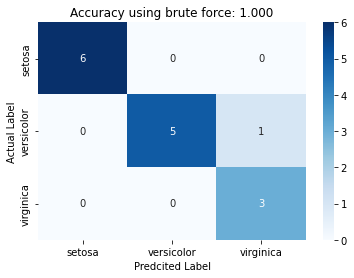

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores=[]
neighbors=list(np.arange(3,50,2))
print(neighbors)
for n in neighbors:
  knn=KNeighborsClassifier(n_neighbors=n,algorithm='brute')
  cross_val=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(cross_val.mean())
error=[1-x for x in cv_scores]
optimal_n=neighbors[error.index(min(error))]
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_n,algorithm='brute')
knn_optimal.fit(x_train,y_train)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute force is {1}".format(optimal_n,acc))
print("Classification report using brute force")
print(classification_report(y_test,pred))
cm=confusion_matrix(y_test,pred)
print(cm)
cm_df=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('Accuracy using brute force: {0:.3f}'.format(accuracy_score(y_test,y_pred)))
plt.ylabel('Actual Label')
plt.xlabel('Predcited Label')
plt.show()


SVM for WINE

Accuracy: 0.7222222222222222
1
Accuracy: 0.6111111111111112
2
Accuracy: 0.6111111111111112
3
Accuracy: 0.7777777777777778
4
Accuracy: 0.6666666666666666
5
Accuracy: 0.9444444444444444
6
Accuracy: 0.6111111111111112
7
Accuracy: 0.7777777777777778
8
Accuracy: 0.6666666666666666
9
Accuracy: 0.7777777777777778
10
Average of the model: 0.7166666666666667
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The accuracy for optimal k = 33 using brute force is 72.22222222222221
Classification report using brute force
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.67      0.57      0.62         7
           2       0.50      0.50      0.50         4

    accuracy                           0.72        18
   macro avg       0.68      0.69      0.68        18
weighted avg       0.71      0.72      0.71        18

[[7 0 0]
 [0 7 0]
 [0 0 4]]


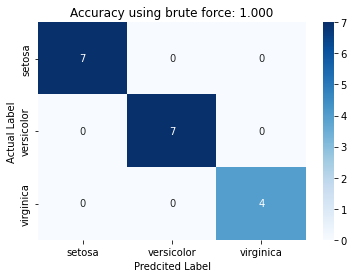

In [ ]:
'''
wine=datasets.load_wine()
print(wine)
print("Features:", wine.feature_names)
print("Labels:", wine.target_names)
'''
x=pd.DataFrame(wine['data'])
'''
print("x head:\n",x.head())
print("shape:\n",wine.data.shape)
y=print(wine.target)
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
comb=[]
value=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.10)
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  comb.append('comb'+str(i))
  value.append(accuracy)
  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(len(value))
value.append((sum(value))/len(value))
print("Average of the model:",(sum(value))/len(value))
'''
plt.bar([0,1,2,3,4],value)
plt.show()
print(y_test)
print(y_pred)
'''
cv_scores=[]
neighbors=list(np.arange(3,50,2))
print(neighbors)

for n in neighbors:
  knn=KNeighborsClassifier(n_neighbors=n,algorithm='brute')
  cross_val=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(cross_val.mean())

error=[1-x for x in cv_scores]
optimal_n=neighbors[error.index(min(error))]
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_n,algorithm='brute')
knn_optimal.fit(x_train,y_train)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)*100

print("The accuracy for optimal k = {0} using brute force is {1}".format(optimal_n,acc))
print("Classification report using brute force")
print(classification_report(y_test,pred))
s=SVC(kernel='linear').fit(x_train,y_train)
s_pred=s.predict(x_test)
acc=accuracy_score(y_test,s_pred)*100
cm=confusion_matrix(y_test,s_pred)
print(cm)
cm_df=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('Accuracy using brute force: {0:.3f}'.format(accuracy_score(y_test,s_pred)))
plt.ylabel('Actual Label')
plt.xlabel('Predcited Label')
plt.show()

SVM for PETAL

Accuracy: 1.0
1
Accuracy: 1.0
2
Accuracy: 0.9333333333333333
3
Accuracy: 0.9333333333333333
4
Accuracy: 1.0
5
Accuracy: 0.9333333333333333
6
Accuracy: 1.0
7
Accuracy: 1.0
8
Accuracy: 1.0
9
Accuracy: 0.8666666666666667
10
Average of the model: 0.9666666666666668
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The accuracy for optimal k = 15 using brute force is 93.33333333333333
Classification report using brute force
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15

[[5 0 0]
 [0 5 0]
 [0 0 5]]


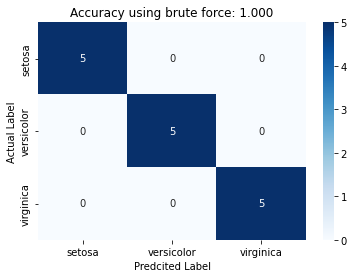

In [ ]:
'''
iris=datasets.load_iris()
print(iris)
print("Features:", iris.feature_names)
print("Labels:", iris.target_names)
'''
x=pd.DataFrame(iris['data'])
'''
print("x head:\n",x.head())
print("shape:\n",iris.data.shape)
y=print(iris.target)
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
comb=[]
value=[]
for i in range(10):
  x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.10)
  knn=KNeighborsClassifier(n_neighbors=10)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  accuracy=metrics.accuracy_score(y_test,y_pred)
  comb.append('comb'+str(i))
  value.append(accuracy)
  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(len(value))
value.append((sum(value))/len(value))
print("Average of the model:",(sum(value))/len(value))
'''
plt.bar([0,1,2,3,4],value)
plt.show()
print(y_test)
print(y_pred)
'''
cv_scores=[]
neighbors=list(np.arange(3,50,2))
print(neighbors)

for n in neighbors:
  knn=KNeighborsClassifier(n_neighbors=n,algorithm='brute')
  cross_val=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
  cv_scores.append(cross_val.mean())

error=[1-x for x in cv_scores]
optimal_n=neighbors[error.index(min(error))]
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_n,algorithm='brute')
knn_optimal.fit(x_train,y_train)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred)*100

print("The accuracy for optimal k = {0} using brute force is {1}".format(optimal_n,acc))
print("Classification report using brute force")
print(classification_report(y_test,pred))
s=SVC(kernel='linear').fit(x_train,y_train)
s_pred=s.predict(x_test)
acc=accuracy_score(y_test,s_pred)*100
cm=confusion_matrix(y_test,s_pred)
print(cm)
cm_df=pd.DataFrame(cm,index=['setosa','versicolor','virginica'],columns=['setosa','versicolor','virginica'])
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.title('Accuracy using brute force: {0:.3f}'.format(accuracy_score(y_test,s_pred)))
plt.ylabel('Actual Label')
plt.xlabel('Predcited Label')
plt.show()

From the tables,
we have observed the following:

TABLE-Sorted according to ACCURACY
    Dataset Name	Classifier            Accuracy
1.  PETAL/IRIS	  KNN with Fixed K      100
2.  WINE	        SVM	                  100
3.  PETAL/IRIS	  SVM                   100
4.  WINE 	        NBT                   94.44
5.  PETAL/IRIS   	KNN with Brute Force 	93.33

TABLE-Sorted according to F1 SCORE
    Dataset Name	Classifier            F1 Score
1.   PETAL/IRIS  	KNN with Fixed K      1
2.   WINE	        SVM                   1
3.   PETAL/IRIS  	SVM                   1
4.   WINE	        NBT                   0.95
5.   PETAL/IRIS	  KNN with Brute Force  0.923333333

TABLE-Sorted according to FPR
    Dataset Name	Classifier            FPR
1.  WINE	        KNN with Brute Force  0.2
2.  WINE	        KNN with Fixed K      0.166666667
3.  PETAL/IRIS	  NBT                   0.133333333
4.  PETAL/IRIS	  KNN with Fixed K      0
5.  WINE	        SVM                   0

LINK TO EXCEL SHEET:

[link text](https://docs.google.com/spreadsheets/d/1SGxWnyFNeOoeoFrSewmqEGZBJntF-SKhdihHEcuqsEY/edit#gid=1377444835)

CURRENT COLAB LINK:

[link text](https://colab.research.google.com/drive/18zB9ZC2xGlwtANrjqHYZvZjbDm4Xa2ZB#scrollTo=NZUkA3UQJUF-)